# dati statistici presenza stranieri a Trento
## mappe one person one dot

tutta colpa di Alberto Cottica con questo [post](https://groups.google.com/forum/?utm_medium=email&utm_source=footer#!msg/spaghettiopendata/87nI_CoU_ME/RB-MUqcqBAAJ)


http://www.comune.trento.it/Aree-tematiche/Statistiche-e-dati-elettorali/Statistiche/Pubblicazioni/Trento-statistica/Trento-Statistica-2018

ehm ... un [pdf](http://www.comune.trento.it/content/download/1210632/11598084/file/Trento_Statistica_2018.pdf) con i dati a dicembre 2018

con dentro questa immagine

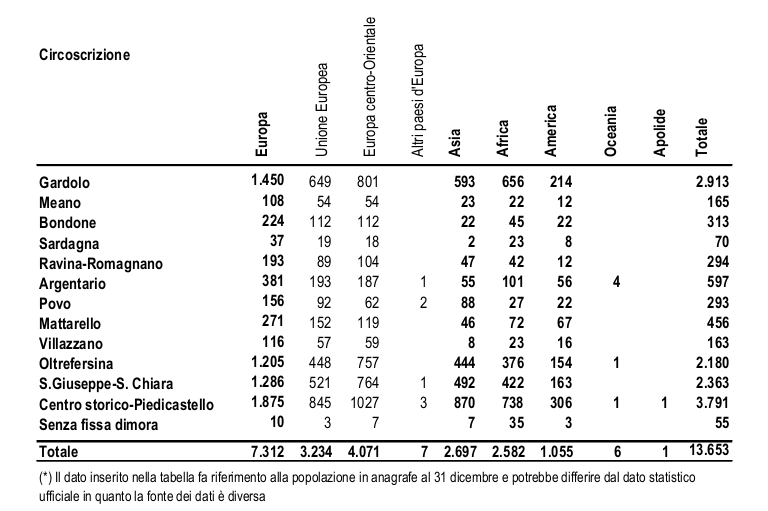

da cui ho creato questo [dataset](trento_stranieri_circoscrizioni_2018.csv) usando tabula selezionando la sola tabella alla pagina 95

Inoltre, il Comune di Trento, offre lo shapefile con le [circoscrizioni](http://webapps.comune.trento.it/cartografia/gis/dbexport?db=base&sc=confini&ly=circoscrizioni&fr=shp)


## let's start with python
il procedimento è il seguente:
- leggere il file .csv con i valori
- recuperare le poligonali di ogni circoscrizione
- generare tanti punti casuali quanti sono il numero di stranieri per categoria proposta nel csv
- creare il vettoriale di punti
- rappresentarlo sopra la mappa delle circoscrizioni di trento

.. il tutto usando geopandas&c



In [49]:
%matplotlib inline

import pandas as pd
import geopandas as gpd

stranieri_x_circoscrizione = pd.read_csv('trento_stranieri_circoscrizioni_2018.csv')
geo_circoscrizioni = gpd.read_file('http://webapps.comune.trento.it/cartografia/gis/dbexport?db=base&sc=confini&ly=circoscrizioni&fr=shp')

In [50]:
stranieri_x_circoscrizione

,Circoscrizione,europa,unione europea,europa centro-orientale,altri paesi di europa,asia,africa,america,oceania,apolide
0,Gardolo,1450,649,801,0,593,656,214,0,0
1,Meano,108,54,54,0,23,22,12,0,0
2,Bondone,224,112,112,0,22,45,22,0,0
3,Sardagna,37,19,18,0,2,23,8,0,0
4,Ravina-Romagnano,193,89,104,0,47,42,12,0,0
5,Argentario,381,193,187,1,55,101,56,4,0
6,Povo,156,92,62,2,88,27,22,0,0
7,Mattarello,271,152,119,0,46,72,67,0,0
8,Villazzano,116,57,59,0,8,23,16,0,0
9,Oltrefersina,1205,448,757,0,444,376,154,1,0


In [40]:
geo_circoscrizioni

,numero_cir,area,perimetro,nome,fumetto,geometry
0,1,8817959,14719,GARDOLO,Circoscrizione n. 1 - GARDOLO,"POLYGON ((663533.9920445343 5108350.626625444,..."
1,2,15712181,17850,MEANO,Circoscrizione n. 2 - MEANO,"POLYGON ((666651.7859553143 5109264.902412654,..."
2,3,36949609,38485,BONDONE,Circoscrizione n. 3 - BONDONE,"POLYGON ((660741.7365247617 5109007.134651093,..."
3,4,8663138,16403,SARDAGNA,Circoscrizione n. 4 - SARDAGNA,"POLYGON ((661627.5398448835 5104968.136650141,..."
4,5,16687779,27197,RAVINA-ROMAGNANO,Circoscrizione n. 5 - RAVINA-ROMAGNANO,"POLYGON ((663871.7277215933 5094972.065648562,..."
5,6,13199398,20575,ARGENTARIO,Circoscrizione n. 6 - ARGENTARIO,"POLYGON ((667907.2132568359 5105334.45300293, ..."
6,7,15433274,18464,POVO,Circoscrizione n. 7 - POVO,"POLYGON ((669076.87890625 5099644.087402344, 6..."
7,9,7342864,15395,VILLAZZANO,Circoscrizione n. 9 - VILLAZZANO,"POLYGON ((666974.7528572429 5098163.981575202,..."
8,11,3073349,10962,S.GIUSEPPE-S.CHIARA,Circoscrizione n. 11 - S.GIUSEPPE-S.CHIARA,"POLYGON ((663312.5435798791 5102745.128685825,..."
9,12,8599464,23151,CENTRO STORICO PIEDICASTELLO,Circoscrizione n. 12 - CENTRO STORICO PIEDICAS...,"POLYGON ((664569.1268118203 5104686.144083303,..."


rimuovo la colonna europa perchè ridondante

In [115]:
stranieri_x_circoscrizione=stranieri_x_circoscrizione.drop(columns=['europa'])

In [179]:
delrow = stranieri_x_circoscrizione[stranieri_x_circoscrizione.Circoscrizione=='Senza fissa dimora'].index[0]
stranieri_x_circoscrizione= stranieri_x_circoscrizione.drop(stranieri_x_circoscrizione.index[delrow])

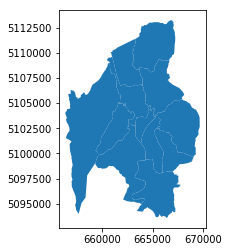

In [180]:
geo_circoscrizioni.plot()

In [181]:
import random
from shapely.geometry import Polygon, Point 

def get_random_point_in_polygon(poly,total,district,kind,init_crs):
    points = {}
    xs = []
    ys = []
    minx, miny, maxx, maxy = poly.bounds
    for i in range(total):
        p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if poly.contains(p):
            xs.append(p.x)
            ys.append(p.y)
    points['x']= xs
    points['y']= ys
    df = pd.DataFrame(points)
    df['district']=district
    df['kind']=kind
    df = gpd.GeoDataFrame(
            df.drop(['x', 'y'], axis=1),
            crs=init_crs,
            geometry=[Point(xy) for xy in zip(df.x, df.y)])
    return df

In [192]:
data = []
for index,row in stranieri_x_circoscrizione.iterrows():
    circoscrizione = row.Circoscrizione.upper().replace("S. ","S.").replace("O-P","O P")
    polygon = geo_circoscrizioni[geo_circoscrizioni.nome==circoscrizione].geometry.values[0]
    for col in stranieri_x_circoscrizione.columns:
        if col != 'Circoscrizione':
            points = get_random_point_in_polygon(polygon,row[col],circoscrizione,col,geo_circoscrizioni.crs)
            data.append(points)
one_person_one_dot = pd.concat(data)

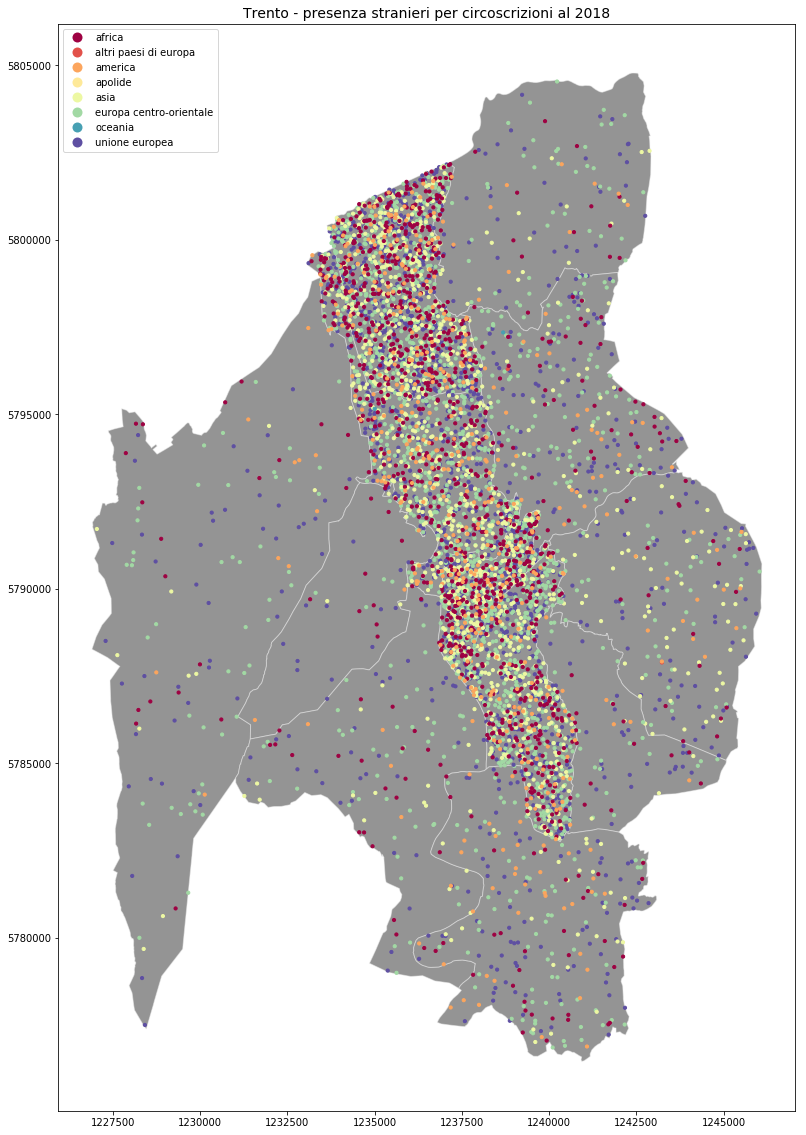

In [271]:
ax = geo_circoscrizioni.plot(facecolor='#eeeeee',edgecolor='#eeeeee',color='#2a2a2a', figsize=(20, 20),alpha=0.5)
ax.set_title('Trento - presenza stranieri per circoscrizioni al 2018',fontsize=14)
one_person_one_dot.plot(ax=ax,markersize=10,column='kind', cmap='Spectral',legend=True)

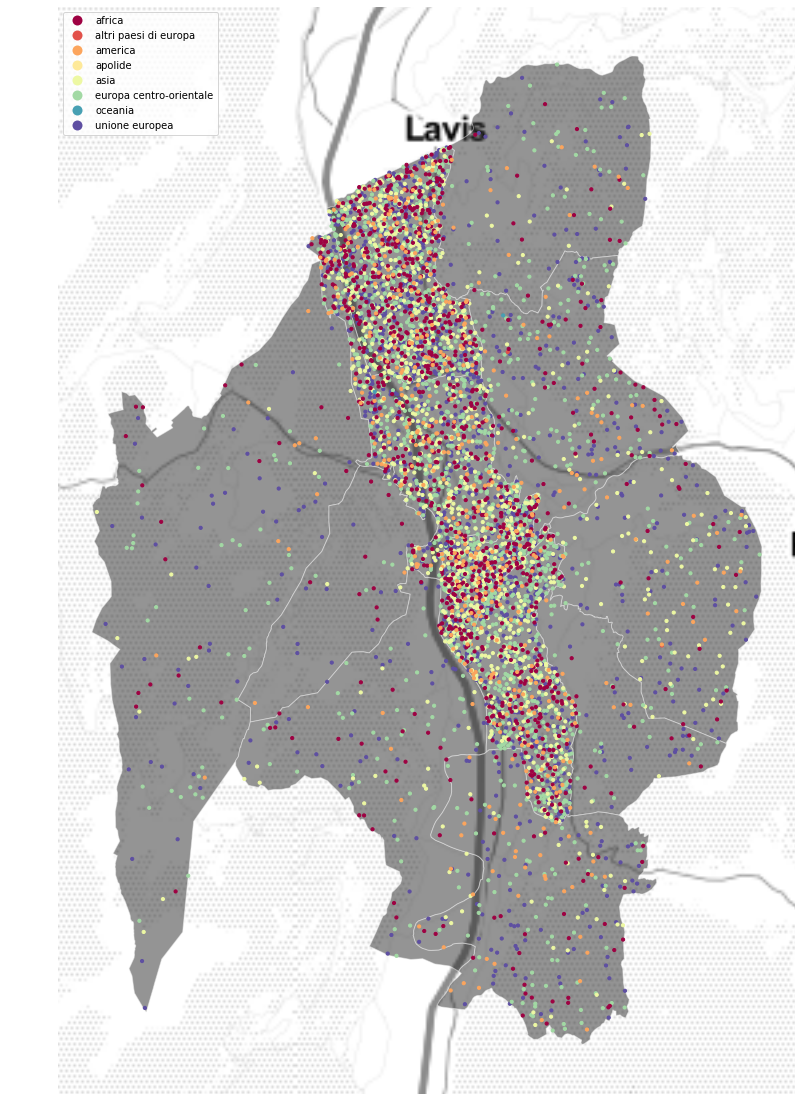

In [257]:
ax = geo_circoscrizioni.plot(facecolor='#eeeeee',edgecolor='#eeeeee',color='#2a2a2a', figsize=(20, 20),alpha=0.5)
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
one_person_one_dot.plot(ax=ax,markersize=10,column='kind', cmap='Spectral',legend=True)
ax.set_axis_off()

In [272]:
one_person_one_dot.to_file('one_person_one_dot_trento.shp')

In [273]:
from zipfile import ZipFile 

In [274]:
with ZipFile('one_person_one_dot_trento.zip','w') as zip: 
    zip.write('one_person_one_dot_trento.shp') 
    zip.write('one_person_one_dot_trento.shx') 
    zip.write('one_person_one_dot_trento.dbf') 
    zip.write('one_person_one_dot_trento.prj') 

Scarica il file .shp da usare in QGIS per fare una mappa migliore :)

[one_person_one_dot_trento.zip'](one_person_one_dot_trento.zip)